<h1 style="font-family: Sans-Serif; padding: 19px; font-size: 40px; color: #641811; text-align: center; line-height: 1.9;">
    <b>Iris Flower Clustering</b>
    <br>
    <span style="color: #CD2DE0; font-size: 25px;">Using  K-Means Machine Learning Algorithms</span>
</h1>
<hr>
<div style="text-align: center;">
    <img src="iris-flower-meaning-and-symbolism.jpg" alt="Diabetes" style="width: 50%; border-radius: 15px;">
</div>


</h2>
<p style="font-family: Arial, sans-serif; font-size: 18px; color: #555; text-align: center; margin-top: 10px;">
    This project demonstrates how machine learning algorithms can be used to clustering for iris.
</p>


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [43]:
df = pd.read_csv("F:\\Machine Learning\\Iris flower dataset\\IRIS.csv")


In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
pd.crosstab(index=df["species"], columns="count")  

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<Axes: xlabel='species', ylabel='count'>

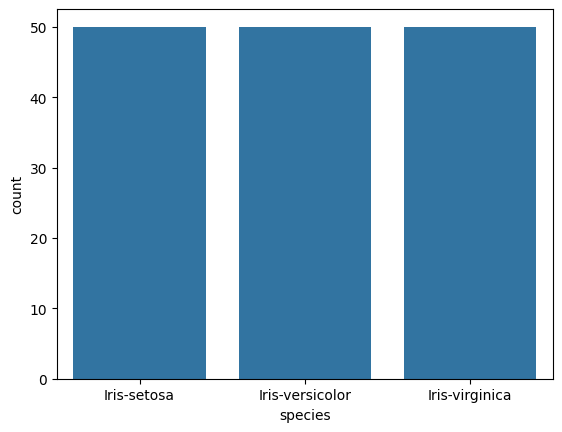

In [49]:
sns.countplot(data= df , x = 'species')

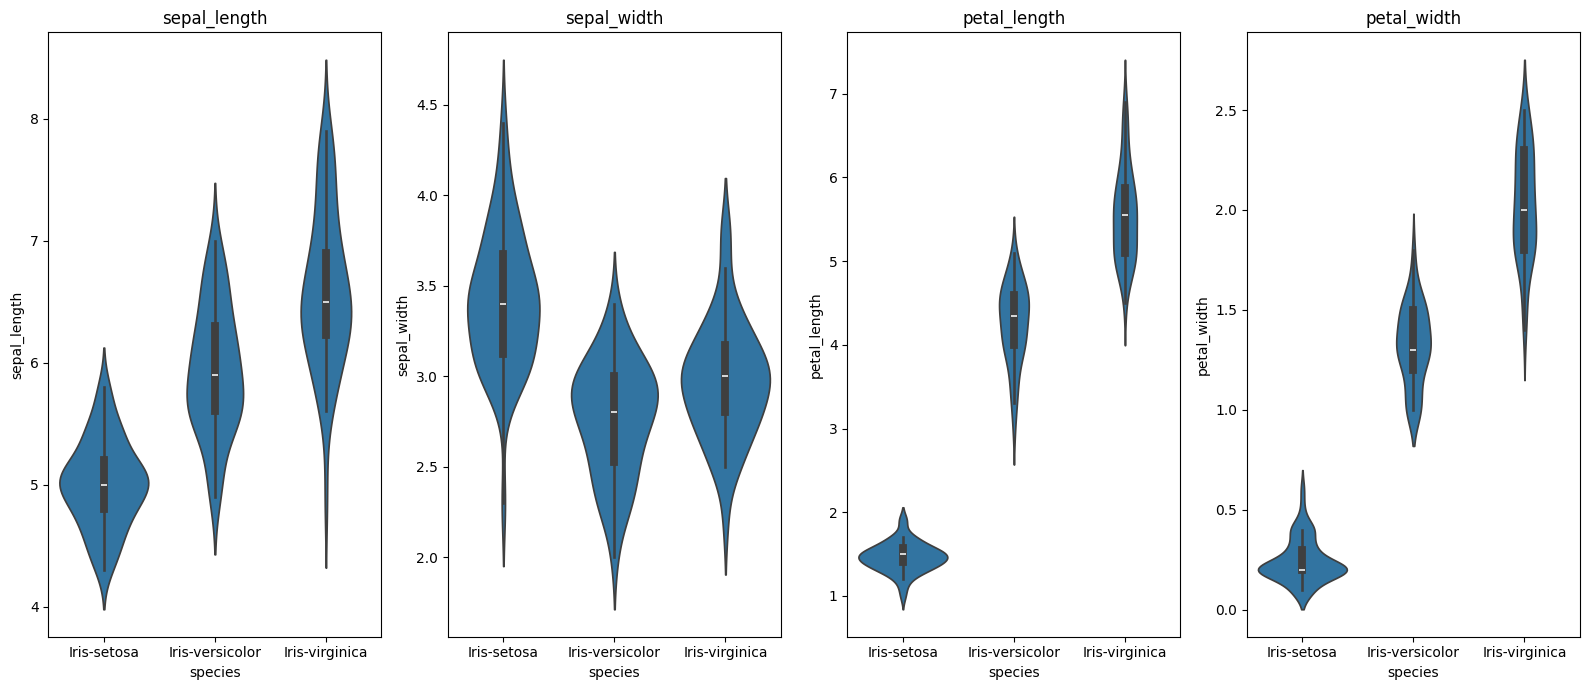

In [50]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
fig, axes = plt.subplots(1, len(features), figsize=(16, 7))

for i , feature in enumerate(features) :
    sns.violinplot(x="species", y=feature, data=df , ax= axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

## **Pairplot for Feature Visualization**
In this code, we create a **pairplot** using Seaborn to visualize the relationships between all pairs of features in the dataset. The `hue` parameter is set to 'species', which means that different species will be represented by different colors in the plots. Each subplot displays a scatter plot for each pair of features along with the corresponding diagonal plots, which represent the distribution of individual features. This visualization helps in understanding the correlations between features and how they vary across different species.


c:\Users\Mamzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


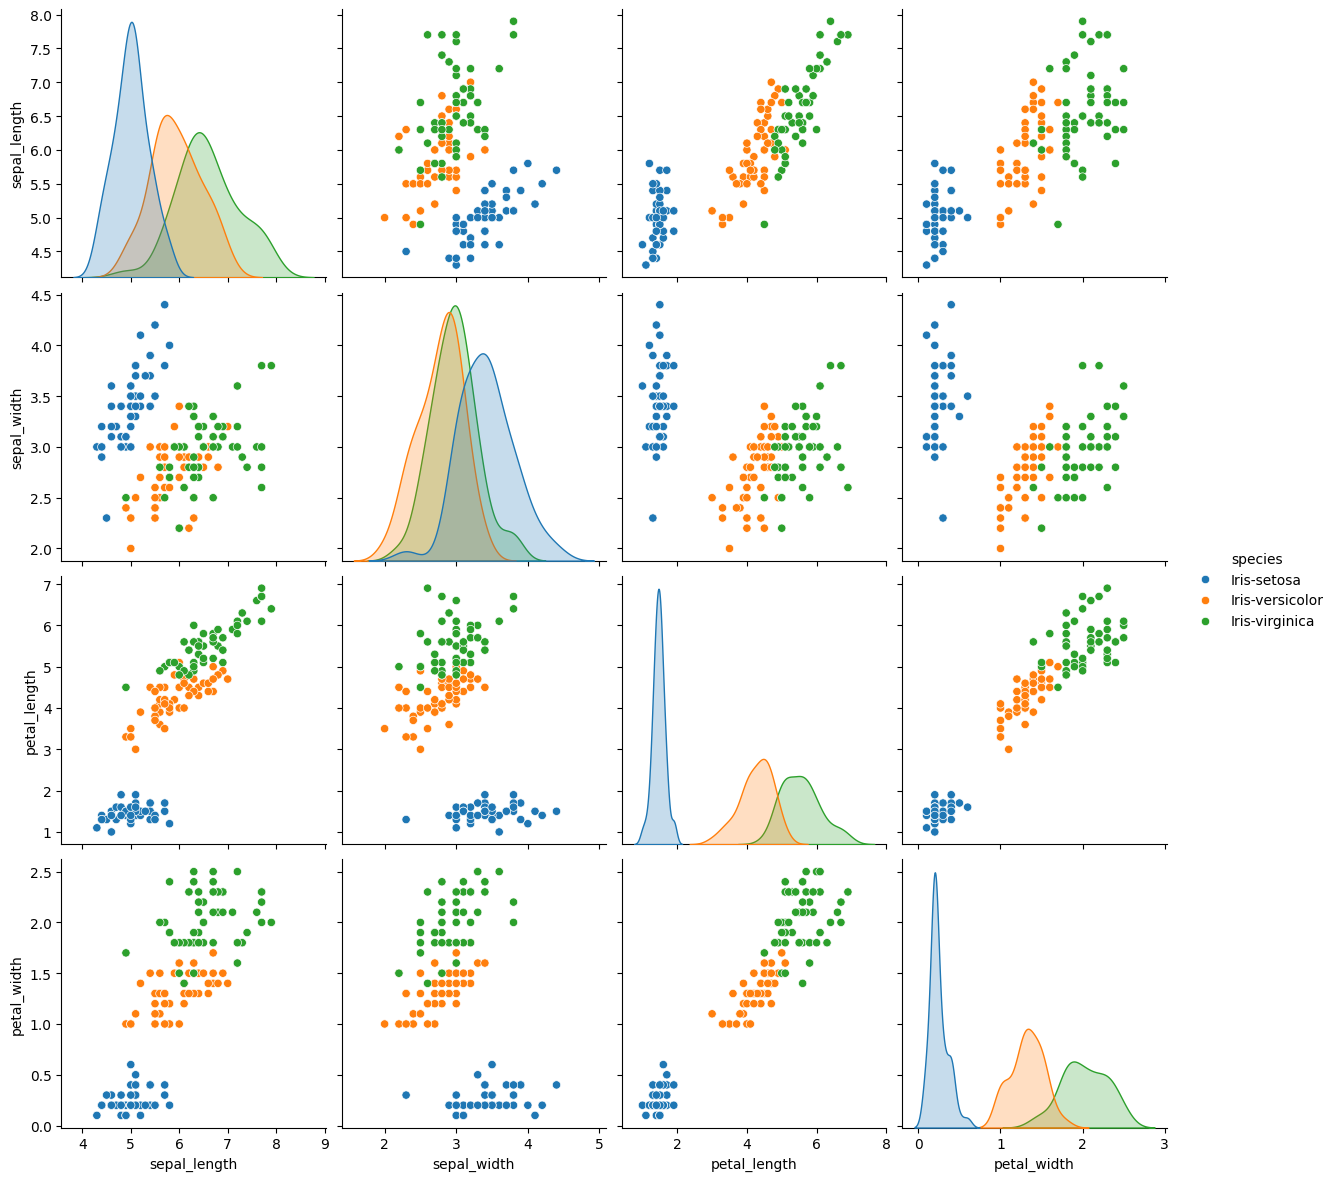

In [51]:
sns.pairplot(data=df , hue= 'species' , size=3)

## **Distribution Plot for Features**

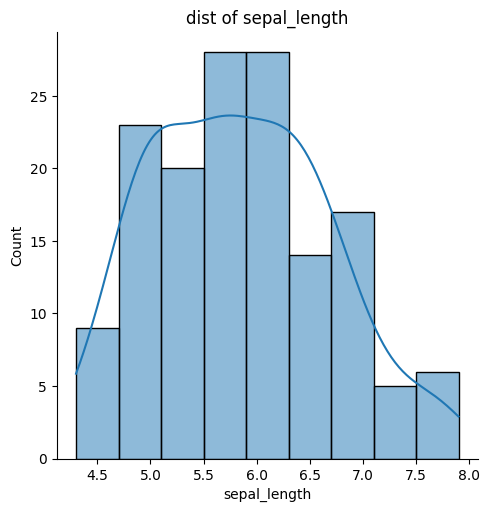

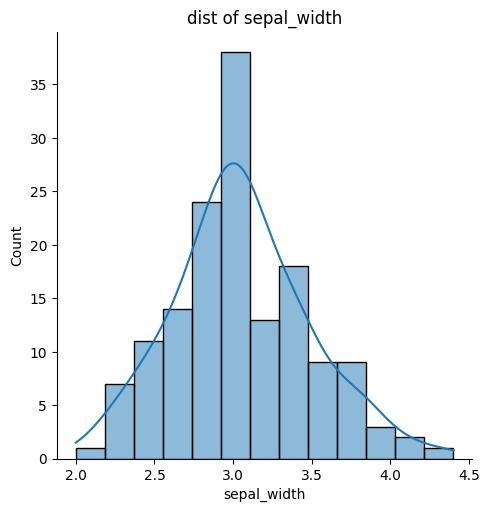

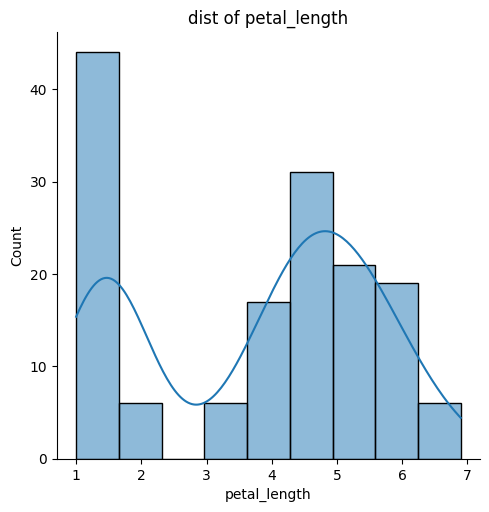

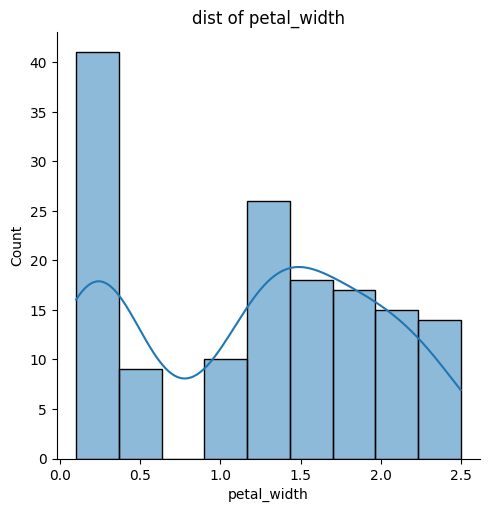

In [52]:
for  feature in (features) :
    sns.displot(data= df ,x = feature , kde = True)
    plt.title(f'dist of {feature}')
    plt.show()

## **Boxplot and Outlier Handling**
In this code, we first create a **boxplot** of the dataset to visualize the distribution of the features. We then calculate the **Interquartile Range (IQR)** for the 'sepal_width' feature, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Using the IQR, we define the minimum and maximum ranges for acceptable values. Any data points outside this range are considered **outliers**. We then replace the outliers in 'sepal_width' with the median of the feature to mitigate their effect. Finally, we create another boxplot to visualize the updated distribution after handling the outliers.


<Axes: >

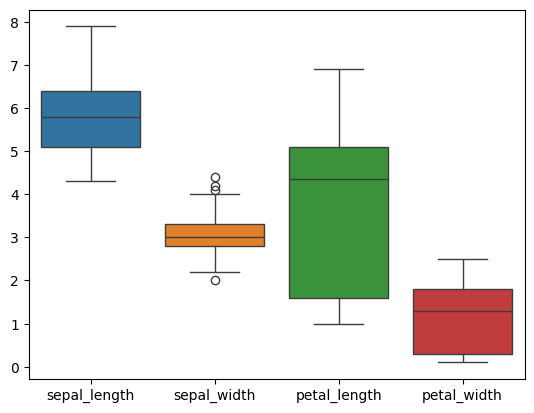

In [53]:
sns.boxplot(data= df)

In [54]:
q1 = df['sepal_width'].quantile(0.25)
q3 = df['sepal_width'].quantile(0.75)
IQR = q3 - q1
min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

outliers_mask = (df['sepal_width'] < min_range) | (df['sepal_width'] > max_range)
df.loc[outliers_mask, 'sepal_width'] = int(np.median(df['sepal_width']))

<Axes: >

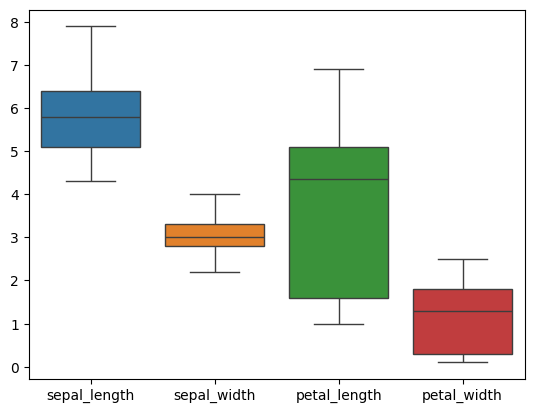

In [55]:
sns.boxplot(data= df)

## **K-Means Clustering**
In this code, we are applying the **K-Means clustering algorithm** to the dataset to find the optimal number of clusters. The algorithm runs for different values of K (from 1 to 10) and calculates the **inertia** (Within-Cluster Sum of Squares, WCSS) for each value of K. The inertia represents how tightly the data points are grouped around the centroids, and we aim to minimize this value. The results can be used in the **Elbow Method** to determine the optimal number of clusters.


In [56]:
from sklearn.cluster import KMeans
inertia = []
x = df.drop('species' , axis= 1)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i , max_iter = 500, n_init = 10, random_state = 42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

## **Elbow Method**
The *Elbow Method* is a technique used to determine the **optimal number of clusters (K)** in K-Means clustering. It works by plotting the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters. As the number of clusters increases, WCSS decreases, but the rate of decrease slows down. The "elbow" point, where the decrease becomes less significant, indicates the **optimal number of clusters**.


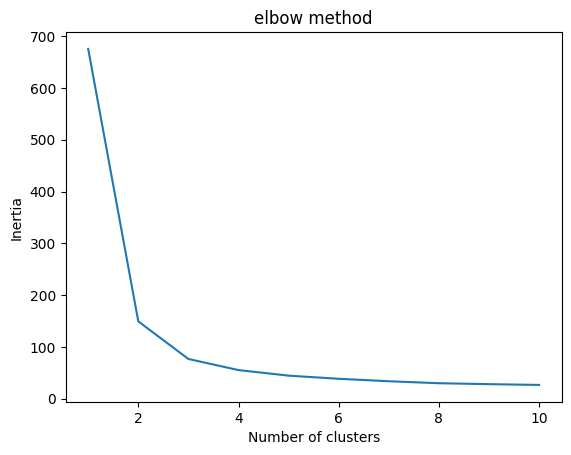

In [57]:
plt.plot(range(1, 11), inertia)
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In this analysis, the plot shows a noticeable "elbow" at K=3, suggesting that this is the optimal number of clusters to consider. At this point, adding more clusters yields diminishing returns in terms of reducing inertia, indicating that the data can be effectively partitioned into 3 distinct clusters.

In [58]:
model = KMeans(n_clusters = 3 , max_iter = 500, n_init = 10, random_state = 42)
y = model.fit_predict(x)

In [59]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [60]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.344     , 1.464     , 0.244     ],
       [5.88360656, 2.75737705, 4.38852459, 1.43442623]])

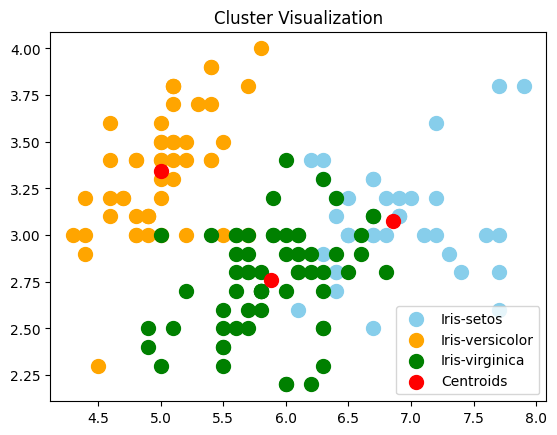

In [61]:
x = np.array(x)
y = np.array(y)
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=100, c='skyblue', label='Iris-setos')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=100, c='orange', label='Iris-versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s=100, c='green', label='Iris-virginica')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Cluster Visualization')
plt.legend()
plt.show()



## **Silhouette_score**

In [62]:
silhouette_score(x , y)

0.5531602359821158